# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from scipy import stats

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df


In [2]:
wine_df = pd.read_csv("winequality-red.csv")
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [3]:
wine_df.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
219,7.8,0.53,0.33,2.4,0.080,24.0,144.0,0.99655,3.30,0.60,9.5,5
1418,7.8,0.53,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,5
334,7.9,0.65,0.01,2.5,0.078,17.0,38.0,0.99630,3.34,0.74,11.7,7
1133,7.2,0.48,0.07,5.5,0.089,10.0,18.0,0.99684,3.37,0.68,11.2,7
207,7.8,0.57,0.31,1.8,0.069,26.0,120.0,0.99625,3.29,0.53,9.3,5
1470,10.0,0.69,0.11,1.4,0.084,8.0,24.0,0.99578,2.88,0.47,9.7,5
521,7.6,0.41,0.49,2.0,0.088,16.0,43.0,0.99800,3.48,0.64,9.1,5
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7
222,6.8,0.61,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.5,5
608,10.1,0.65,0.37,5.1,0.110,11.0,65.0,1.00260,3.32,0.64,10.4,6


# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
wine_df.info()
#Info itself gives the shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_df.shape

(1599, 12)

# Q4 Print the descriptive statistics of each & every column using describe() function

In [6]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

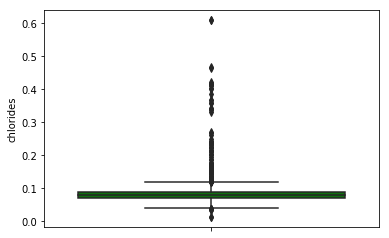

In [7]:
sns.boxplot(wine_df.chlorides, color = "green", orient = "v")

In [8]:
Q1 = wine_df.quantile(0.25)
Q3 = wine_df.quantile(0.75)
IQR = Q3 - Q1
((wine_df < (Q1 - 1.5 * IQR)) | (wine_df > (Q3 + 1.5 * IQR))).sum()

fixed_acidity            49
volatile_acidity         19
citric_acid               1
residual_sugar          155
chlorides               112
free_sulfur_dioxide      30
total_sulfur_dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
quality                  28
dtype: int64

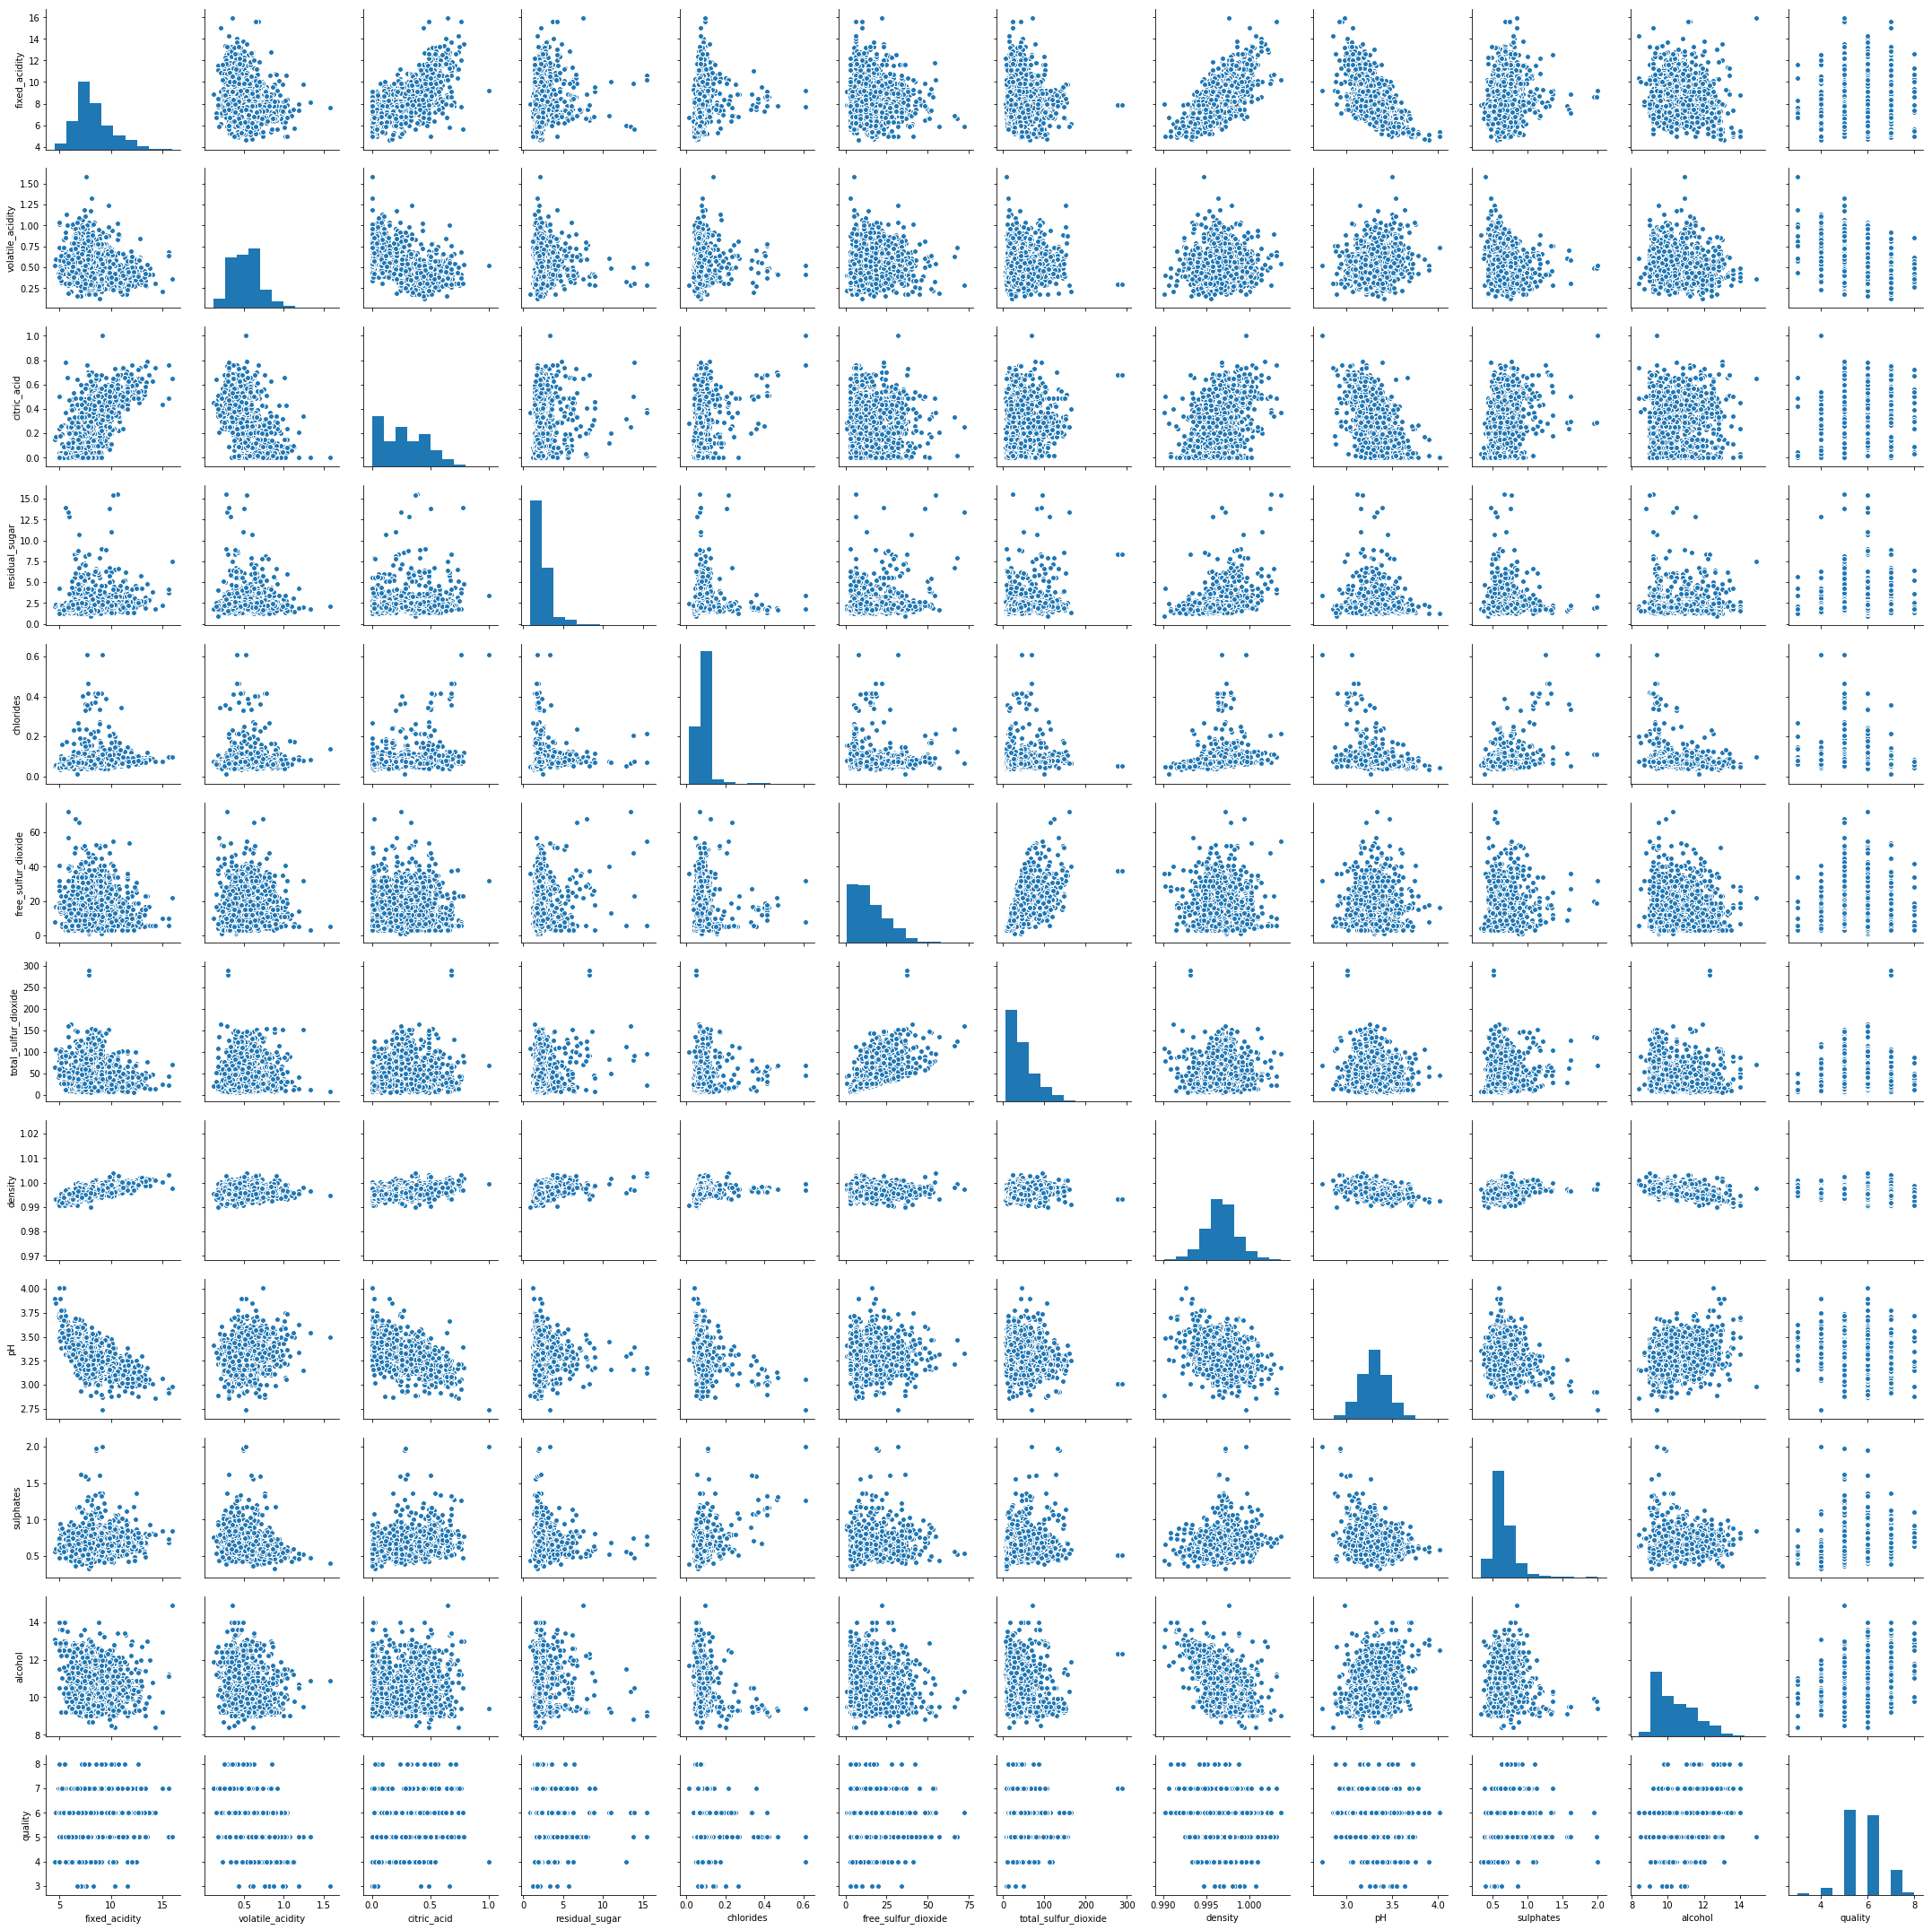

In [9]:
sns.pairplot(wine_df)

In [10]:
# By looking at the diagonal plot of Residual Sugar and Chlorides, the data seems to be right skewed.
# Outliers count of those 2 attributes are also higher compared to other attributes. 
# That's very evident from the boxplot of those attributes 

# Only one row that was pushing the values to the right for those attributes. 
# So replacing those values alone with second largest value.
wine_df['chlorides'].replace(0.611, 0.467, inplace=True)
wine_df['residual_sugar'].replace(15.5, 13.8, inplace=True)

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


In [11]:
wine_df.corr(method='pearson')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114533,0.096170,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.002982,0.063739,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.144053,0.202776,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114533,0.002982,0.144053,1.000000,0.058362,0.188990,0.204899,0.355253,-0.085273,0.005555,0.043222,0.014420
chlorides,0.096170,0.063739,0.202776,0.058362,1.000000,0.007136,0.048383,0.204368,-0.266860,0.371348,-0.223446,-0.129806
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.188990,0.007136,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.204899,0.048383,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355253,0.204368,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085273,-0.266860,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005555,0.371348,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


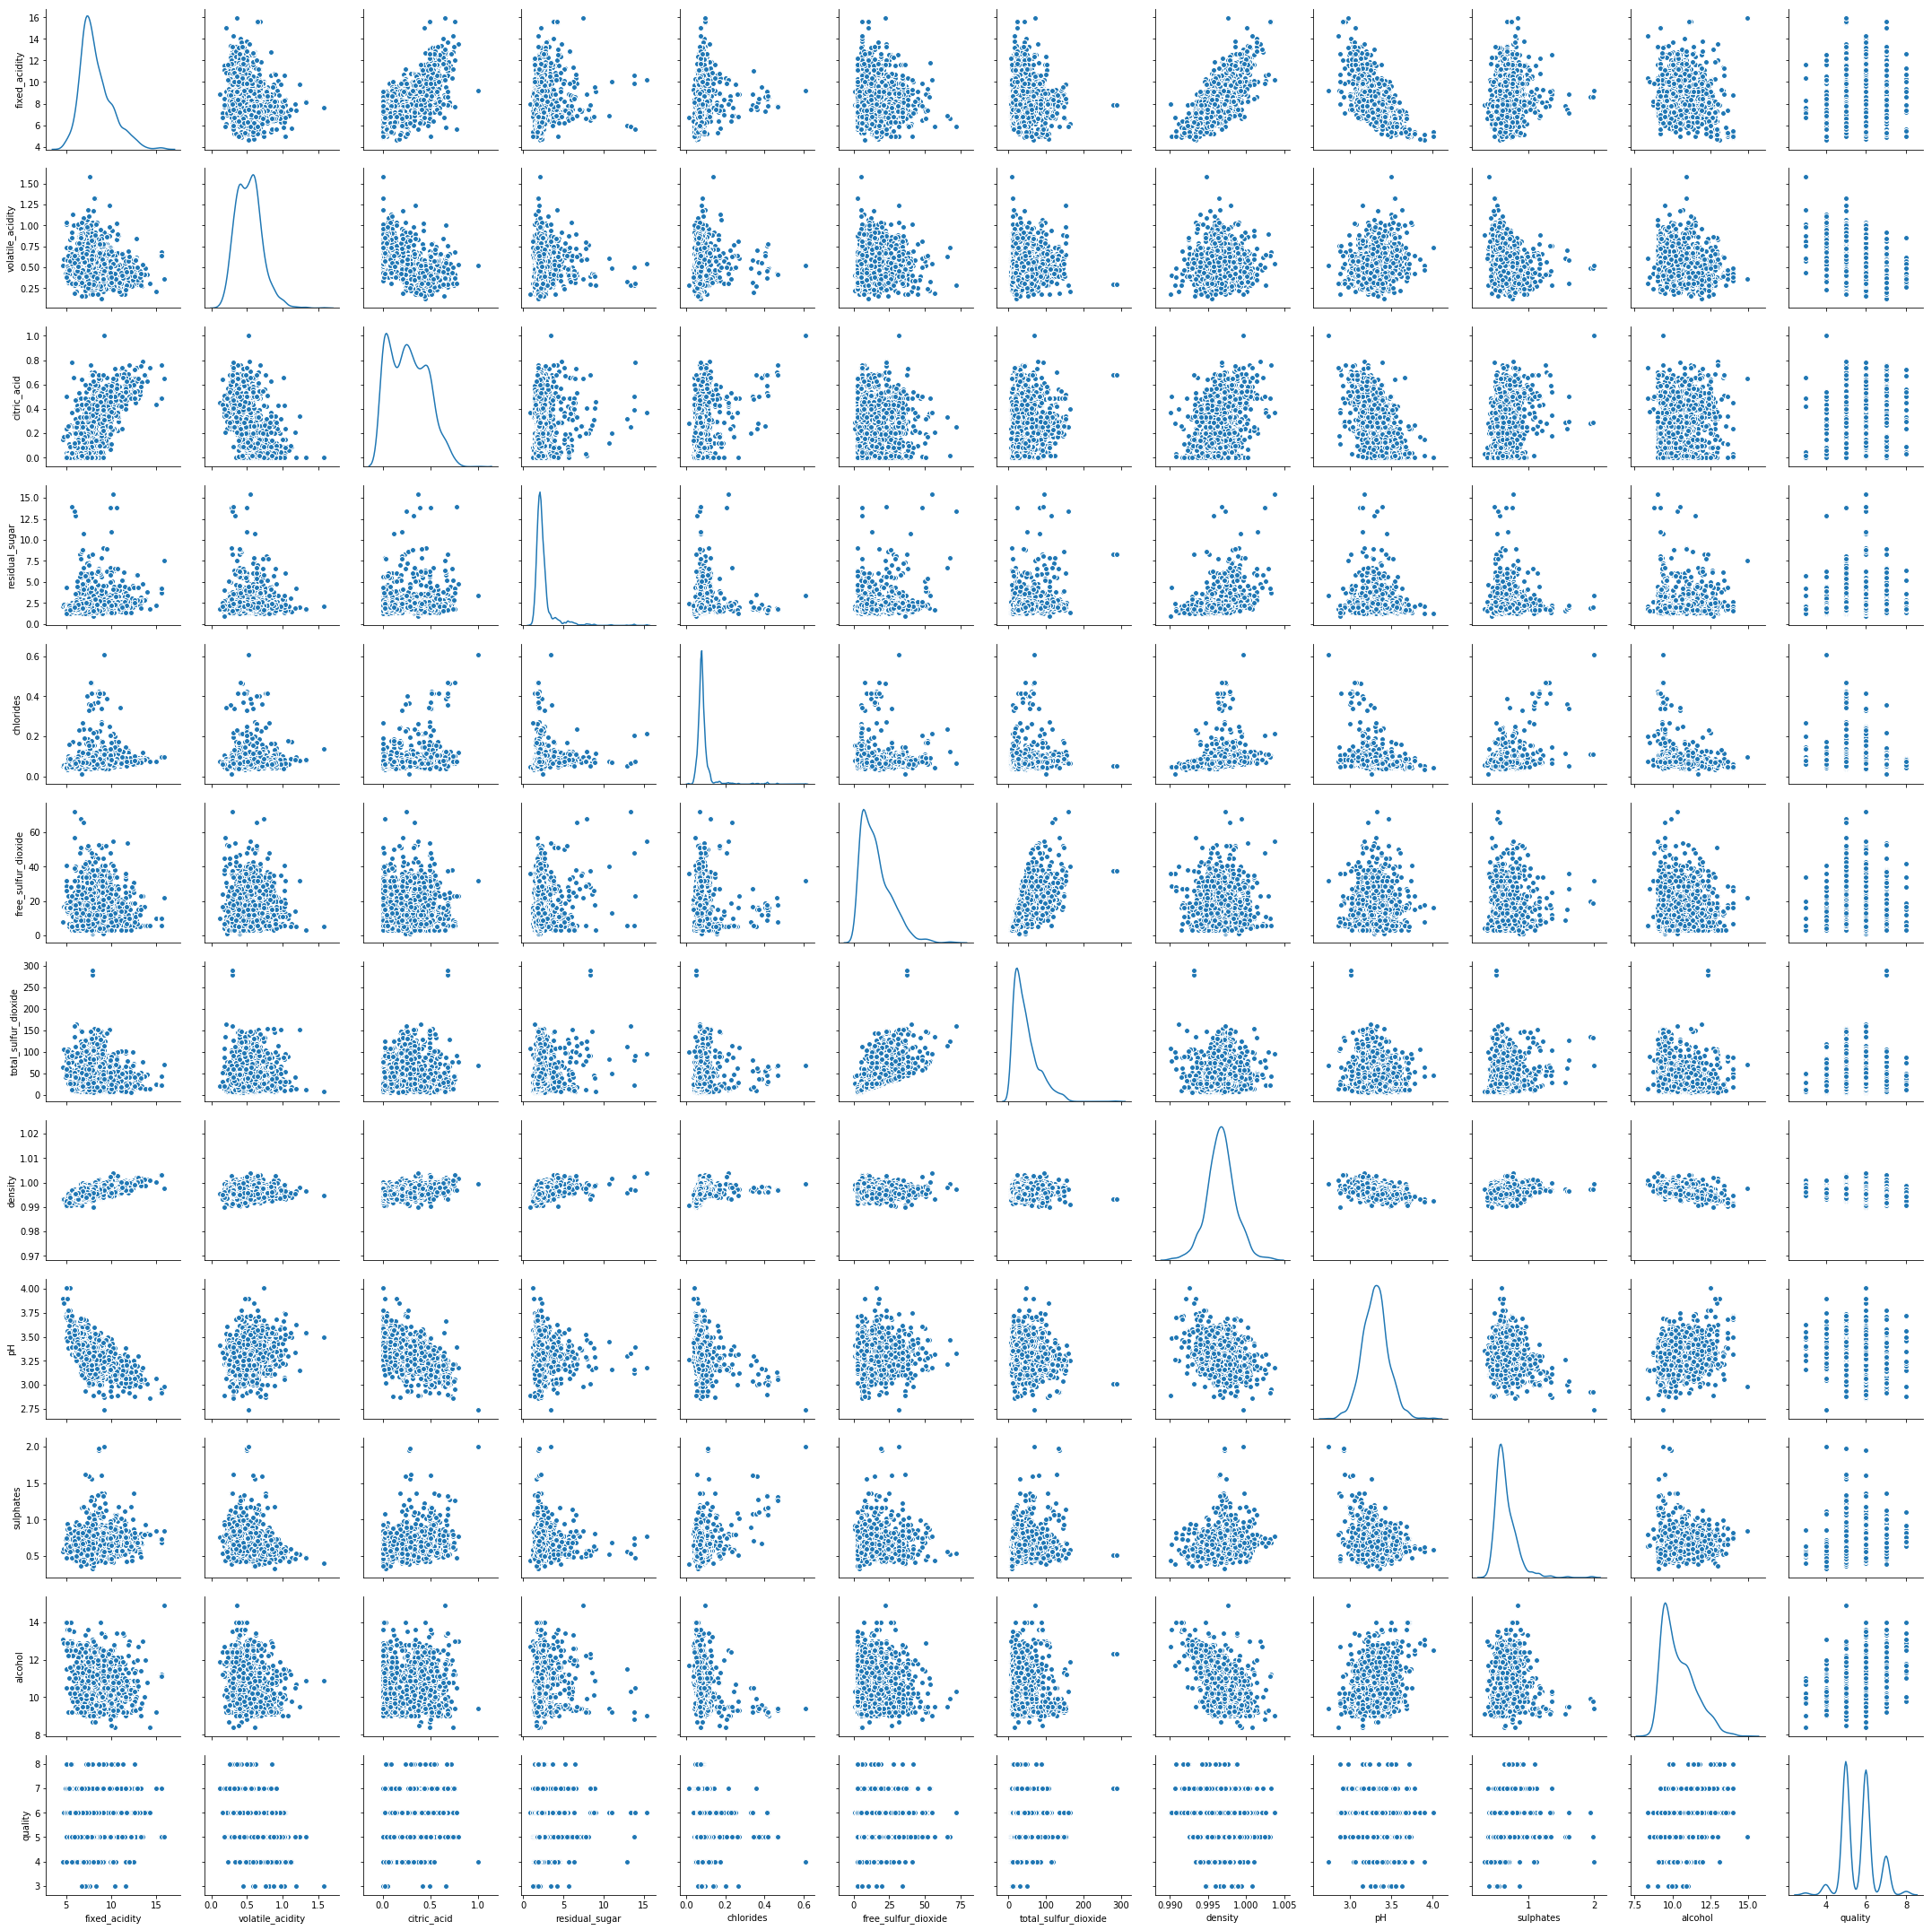

In [12]:
sns.pairplot(wine_df,diag_kind='kde')

In [13]:
# There seems be some correlation between a fre variables
# 1. citric acid has negative correlation with volatile acidity
# 2. citric acid has possitve correlation with fixed acidity
# 3. ph has negative correlation with fixed acidity and citric acidity
# 4. density and fixed acidity seems to be correlated
# 5. free_sulfur_dioxide and total_sulfur_dioxide are correlated
# 6. only attribute that seems to be correlated with quality is alocohol

# Q7 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



In [14]:
X = wine_df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
             'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
Y = wine_df[['quality']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [15]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q9 Print the accuracy of the model & print the confusion matrix 

In [16]:
print(dt_model.score(X_test , y_test))

0.6166666666666667


In [17]:
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[  0   0   1   0   0   0]
 [  1   2  12   6   1   0]
 [  0   4 133  50   2   0]
 [  0   5  46 131  21   2]
 [  0   0   4  25  29   0]
 [  0   0   0   3   1   1]]


# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [18]:
#dt_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5 )
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
dt_model.score(X_test , y_test)

0.5958333333333333

In [20]:
#When max depth was 5, the accuracy was just 50. When it is increased above 15, the accuracy is maintaned at 60-62.

# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

C:\AIML\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.6666666666666666
[[  0   0   1   0   0   0]
 [  1   0  15   5   1   0]
 [  0   0 145  42   2   0]
 [  0   0  40 146  19   0]
 [  0   0   1  29  28   0]
 [  0   0   0   2   2   1]]


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [23]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators=5)
abcl = abcl.fit(X_train, y_train)

C:\AIML\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.5416666666666666
[[  0   0   1   0   0   0]
 [  0   0  12  10   0   0]
 [  0   0 119  70   0   0]
 [  0   0  64 141   0   0]
 [  0   0   3  55   0   0]
 [  0   0   0   5   0   0]]


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [25]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(X_train, y_train)

C:\AIML\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.6833333333333333
[[  0   0   0   1   0   0]
 [  1   1  15   4   1   0]
 [  0   1 147  40   1   0]
 [  0   0  37 148  20   0]
 [  0   0   2  25  31   0]
 [  0   0   0   2   2   1]]


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)

C:\AIML\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.65
[[  0   0   1   0   0   0]
 [  0   3  13   5   1   0]
 [  0   2 138  47   1   1]
 [  0   4  43 142  15   1]
 [  0   0   1  29  28   0]
 [  0   0   0   3   1   1]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.